# MDF Code Modified From Hai He (Luo et al. 2023)

In [1]:
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_, ureg, Reaction
import equilibrator_pathway
from equilibrator_pathway import ThermodynamicModel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ureg.default_format = ".2f~P"
plt.rc('axes', axisbelow=True)
ureg.setup_matplotlib(True)

comp_contrib = ComponentContribution()

In [2]:
comp_contrib.p_h = Q_(7.8) #Intracellular pH of P. putida
comp_contrib_strength = Q_('250 mM')
comp_contrib.p_mg = Q_(3)

In [3]:
Ser = ThermodynamicModel.from_sbtab("Ser_noMDH_highCO2.tsv", comp_contrib=comp_contrib) #Change input file
print(Ser.net_reaction_formula)

3 atp + co2 + coa + faldh + h2o + nadh + nadph = accoa + 3 adp + nad + nadp + 3 pi


In [4]:
Ser.update_standard_dgs()
mdf_result_Ser = Ser.mdf_analysis()

mdf_result_Ser.reaction_df

,reaction_id,reaction_formula,flux,original_standard_dg_prime,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,FALDH,faldh + h2o + nad = for + nadh,1.00 mM/s,-55.21 kJ/mol,-50.40 kJ/mol,-50.40 kJ/mol,-38.96 kJ/mol,0.00000
1,FTL,atp + for + thf = 10fthf + adp + pi,1.00 mM/s,-1.96 kJ/mol,-5.97 kJ/mol,-5.97 kJ/mol,-8.74 kJ/mol,0.20069
2,MTHFC,10fthf = h2o + methf,1.00 mM/s,5.56 kJ/mol,5.22 kJ/mol,5.22 kJ/mol,-8.74 kJ/mol,0.20069
3,MTHFD,methf + nadph = mlthf + nadp,1.00 mM/s,-5.01 kJ/mol,-5.62 kJ/mol,-5.62 kJ/mol,-8.74 kJ/mol,0.20069
4,SHMT,gly__L + h2o + mlthf = ser__L + thf,1.00 mM/s,6.67 kJ/mol,5.63 kJ/mol,5.63 kJ/mol,-8.74 kJ/mol,0.20069
5,SGAT,glx + ser__L = gly__L + hpyr,1.00 mM/s,-4.16 kJ/mol,-8.74 kJ/mol,-8.74 kJ/mol,-8.74 kJ/mol,0.19725
6,HPR,hpyr + nadh = glyc__D + nad,1.00 mM/s,-26.42 kJ/mol,-26.19 kJ/mol,-26.19 kJ/mol,-12.22 kJ/mol,0.00000
7,GK,atp + glyc__D = 2pg + adp,1.00 mM/s,-12.52 kJ/mol,-11.94 kJ/mol,-11.94 kJ/mol,-12.91 kJ/mol,0.00000
8,ENO,2pg = h2o + pep,1.00 mM/s,-3.81 kJ/mol,-3.73 kJ/mol,-3.73 kJ/mol,-12.40 kJ/mol,0.00000
9,PPC,co2 + h2o + pep = oaa + pi,1.00 mM/s,-41.91 kJ/mol,-41.18 kJ/mol,-41.18 kJ/mol,-23.50 kJ/mol,0.00000


In [5]:
print(f"physiological_dg_prime of overall reaction:",
    f"{mdf_result_Ser.reaction_df['physiological_dg_prime'].sum()}")

print(f"optimized_dg_prime of overall reaction:",
    f"{mdf_result_Ser.reaction_df['optimized_dg_prime'].sum()}")

physiological_dg_prime of overall reaction: -173.73 kJ/mol
optimized_dg_prime of overall reaction: -178.03 kJ/mol


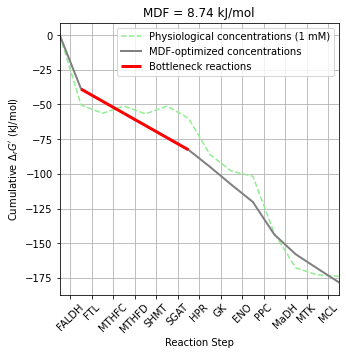

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
mdf_result_Ser.plot_driving_forces(ax)
ax.grid('on')
fig.savefig('mdf_result_Ser_noMDH_highCO2.eps') #Change output file name

In [7]:
mdf_result_Ser.compound_df

,compound_id,concentration_in_molar,lower_bound_in_molar,upper_bound_in_molar,shadow_price
0,faldh,0.000010,0.000001,0.00100,-0.00000
1,h2o,1.000000,1.000000,1.00000,-0.00000
2,nad,0.001000,0.001000,0.00100,-0.00000
3,for,0.010000,0.000001,0.01000,0.49723
4,nadh,0.000100,0.000100,0.00010,0.00000
5,thf,0.000522,0.000001,0.01000,0.00000
6,atp,0.005000,0.005000,0.00500,0.49723
7,10fthf,0.001707,0.000001,0.01000,0.00000
8,adp,0.000500,0.000500,0.00050,-0.49723
9,pi,0.010000,0.010000,0.01000,-0.49723


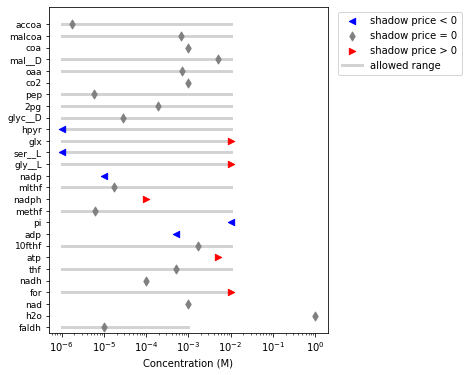

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
mdf_result_Ser.plot_concentrations(ax)
fig.savefig('mdf_result_Ser_noMDH_highCO2_cpd.eps') #Change output file name